In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
dt=pd.read_csv('heart.csv')
dt['HeartDisease'].astype(float)


In [13]:
dt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
dt.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


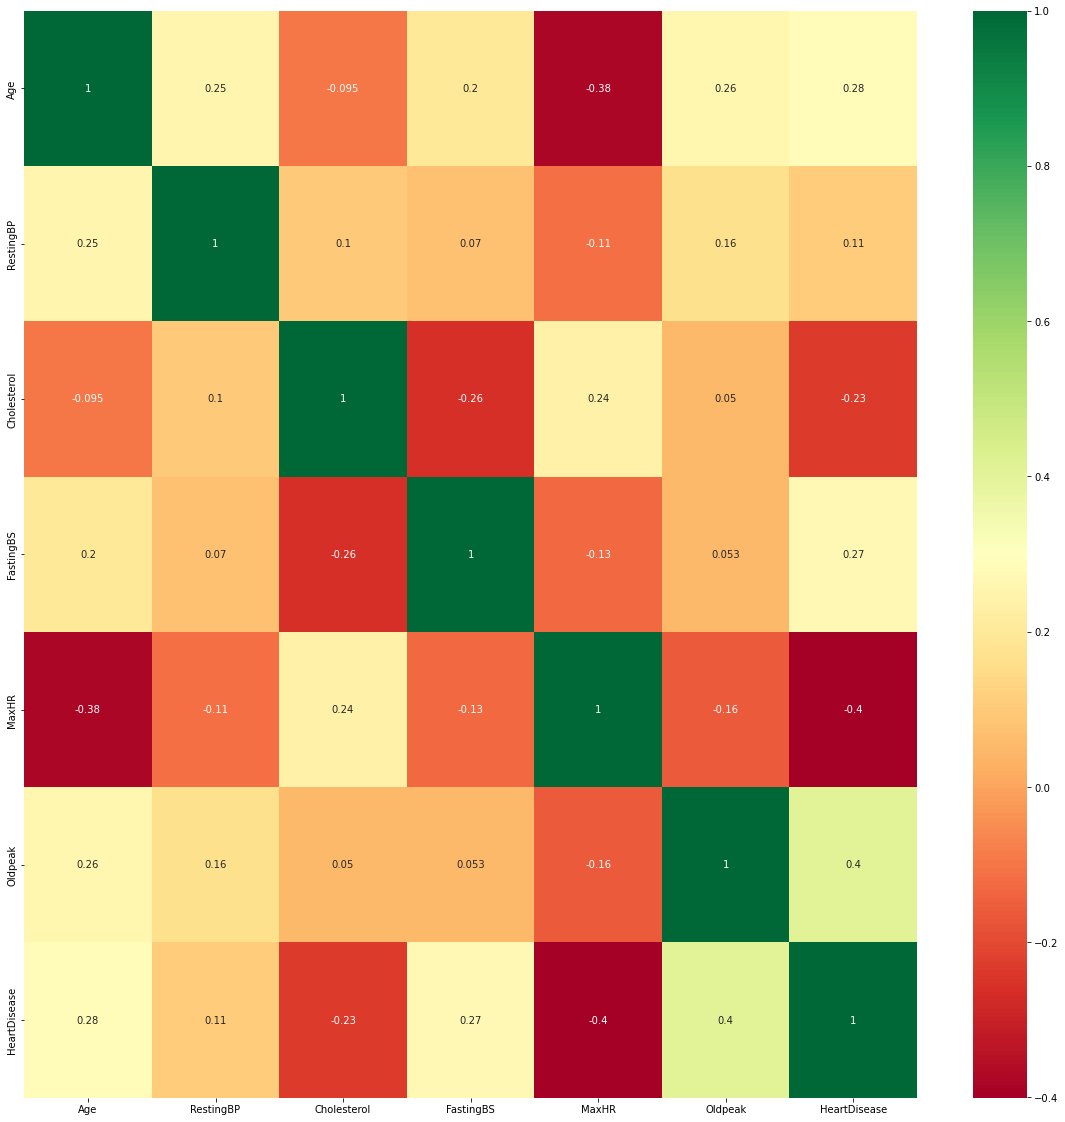

In [17]:
import seaborn as sns
#get correlations of each features in dataset
corrmat =dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dt[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

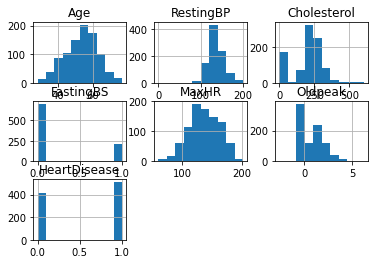

In [10]:
dt.hist()

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

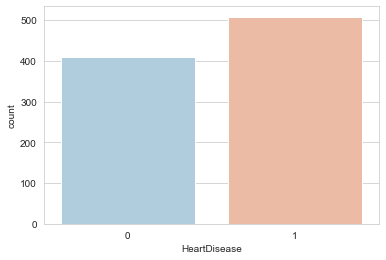

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=dt,palette='RdBu_r')

In [21]:
#Data Processing
heart=pd.get_dummies(dt,columns=['Sex','ChestPainType','MaxHR','FastingBS','ExerciseAngina','RestingECG'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler =StandardScaler()
columns_to_scale=['Age','Cholesterol','Oldpeak','RestingBP']
heart[columns_to_scale]= standardScaler.fit_transform(dataset[columns_to_scale])

NameError: name 'dataset' is not defined

In [23]:
heart.head()

,Age,RestingBP,Cholesterol,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,MaxHR_194,MaxHR_195,MaxHR_202,FastingBS_0,FastingBS_1,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,0.0,Up,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
1,49,160,180,1.0,Flat,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,37,130,283,0.0,Up,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,48,138,214,1.5,Flat,1,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0.0,Up,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [24]:
y=heart['HeartDisease']
x=heart.drop(['HeartDisease'], axis=1)

In [25]:
from sklearn.model_selection import cross_val_score
knn_score=[]
for k in range(1,21):
    knn_classifier =KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'Accuracy_Rate vs Accuracy')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

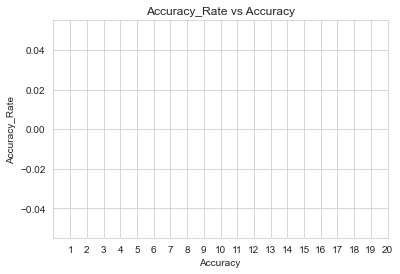

In [26]:
plt.plot([k for k in range(1,21)], knn_score, color='red')
for i in range(1,21):
    plt.text(i, knn_score[i-1],(i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Accuracy')
plt.ylabel('Accuracy_Rate')
plt.title('Accuracy_Rate vs Accuracy')

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)


In [28]:
score.mean()

nan

In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

nan

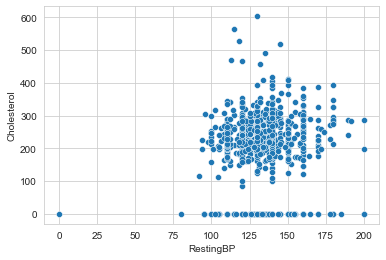

In [31]:
sns.scatterplot(x='RestingBP',y='Cholesterol',data=dt)
plt.show()

In [42]:
dt.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [43]:
dt.Sex.unique()

array(['M', 'F'], dtype=object)

In [44]:
pd.get_dummies(dt['Sex']).head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [45]:
Sex=pd.get_dummies(dt['Sex'],drop_first=True)
Sex.head()

,M
0,1
1,0
2,1
3,0
4,1


In [46]:
dt.ChestPainType.unique()
pd.get_dummies(dt['ChestPainType']).head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [47]:
ChestPainType=pd.get_dummies(dt['ChestPainType'],drop_first=True)
ChestPainType.head(5)

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0


In [48]:
new_data=pd.concat([dt,Sex,ChestPainType],axis=1) 
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,M,ATA,NAP,TA
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0


In [49]:
new_data.drop(['Sex','ChestPainType'],axis=1,inplace=True);
     

new_data.head()
     

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,M,ATA,NAP,TA
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0


In [50]:
y=new_data.RestingECG
     

y.head()

0    Normal
1    Normal
2        ST
3    Normal
4    Normal
Name: RestingECG, dtype: object